## Задание
Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

## Описание данных
* `order_id - id` заказа
* `delivery_time` - время доставки в минутах
* `district` - район доставки
* `experiment_group` - экспериментальная группа


Для начала давайте сформулируем гипотезы для проверки. Выберите статистические гипотезы, которые мы сможем проверить в этом эксперименте:
* **Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет**
* **Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть**




Визуализуем графики распределения и  экспериментальные группы:

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from scipy import stats

In [17]:
data = pd.read_csv('/Users/pavel/Desktop/karpov/7 СТАТИСТИКА/4 experiment_lesson_4.csv')
data.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


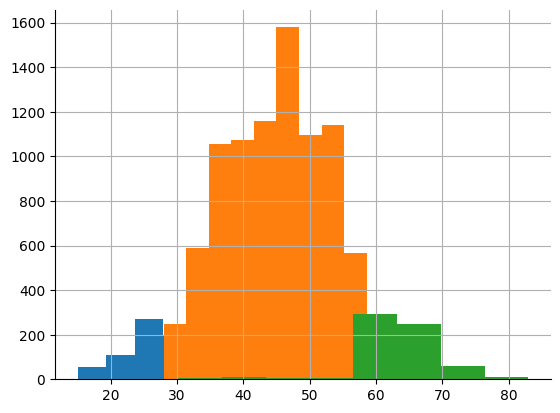

In [43]:
data.query("experiment_group == 'control'").groupby("district").delivery_time.hist()
sns.despine()

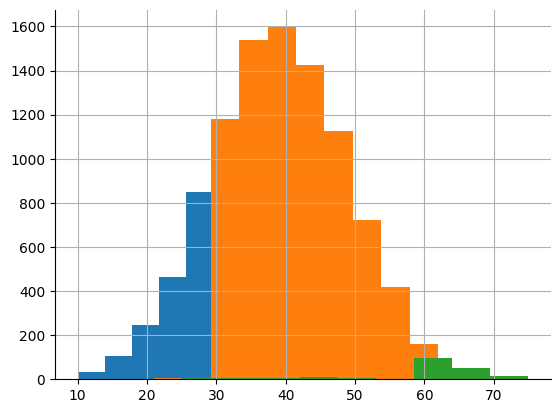

In [42]:
data.query("experiment_group == 'test'").groupby("district").delivery_time.hist()
sns.despine()

б - `тест`

а - `контроль`

# Задание 3
Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [44]:
data.query("experiment_group == 'test'").delivery_time.count()

10104

In [45]:
data.query("experiment_group == 'control'").delivery_time.count()

10092

In [47]:
abs(data.query("experiment_group == 'test'").delivery_time.count() - \
    data.query("experiment_group == 'control'").delivery_time.count())

12

Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

Сделаем семплирование перед применением критерия при проверке на нормальность (и для теста, и для контроля), так как на больших выборках мы можете получать неверные результаты

In [84]:
sample_test = data[data['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)
scipy.stats.shapiro(sample_test)

ShapiroResult(statistic=0.9975472092628479, pvalue=0.13997377455234528)

In [85]:
sample_control = data[data['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17)
scipy.stats.shapiro(sample_control)

ShapiroResult(statistic=0.9974727630615234, pvalue=0.12415609508752823)

In [86]:
np.round(data.query("experiment_group == 'test'").delivery_time.std(), 2)

9.88

In [87]:
np.round(data.query("experiment_group == 'control'").delivery_time.std(), 2)

9.99

Для того, чтобы проверить нормальность распределения, я использую `SHAPIRO-WILK TEST`. Этот тест показывает, что значения в тестовой группе распределены `НОРМАЛЬНО`. В контрольной группе распределение является `НОРМАЛЬНЫМ`. Стандартное отклонение времени доставки в тесте равно `9.88`. Стандартное отклонение времени доставки в контроле равно `9.99`.


Сравним средние в тесте и контроле.

In [88]:
scipy.stats.ttest_ind(data.query("experiment_group == 'test'").delivery_time,\
                     data.query("experiment_group == 'control'").delivery_time)

TtestResult(statistic=-43.03582663183714, pvalue=0.0, df=20194.0)

Для сравнения средних в данных экспериментальных группах я использую `STUDENT'S T-TEST`. Статистика в тесте равна `-43`, p-value `<= 0.05`.


На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной? 

In [107]:
np.round((data.query("experiment_group == 'test'").delivery_time.mean() - \
data.query("experiment_group == 'control'").delivery_time.mean()) / \
data.query("experiment_group == 'control'").delivery_time.mean() * 100, 2)

-13.35

Ответ: `-13.35`

**В итоге раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.**